# LoL Esports 2024 Data Analysis

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [140]:
df = pd.read_csv('data/2024_LoL_esports_match_data_from_OraclesElixir1.csv', sep=';')

print(f"Dataset dimensions: {df.shape}")
print(f"\nFirst rows:")
df

Dataset dimensions: (12276, 123)

First rows:


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,1,Blue,top,Zika,oe:player:65ed20b21e2993fb00dbd21a2fd991b,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Aatrox,Akali,Nocturne,K'Sante,Lee Sin,Wukong,1886,0,1,3,1,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092,225.6204,0.169648,564.1463,NaN,14,0.4454,4,0.1273,5,24,0.7635,11083,6960,221.4210,0.237608,10784,NaN,279.0,256.0,23,16.0,0.0,8.8759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,2,Blue,jng,Weiwei,oe:player:57da8dfcfbdb4e5b019fe93003db1c4,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Maokai,Akali,Nocturne,K'Sante,Lee Sin,Wukong,1886,0,0,4,3,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7361,234.1782,0.176101,847.4761,NaN,10,0.3181,12,0.3818,10,39,1.2407,8636,4513,143.5737,0.154069,8840,NaN,153.0,14.0,139,111.0,3.0,4.8674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,3,Blue,mid,Scout,oe:player:71e79ef80600d398d90cfebe3b0b758,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Orianna,Akali,Nocturne,K'Sante,Lee Sin,Wukong,1886,0,0,2,0,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10005,318.2927,0.239355,432.2163,NaN,4,0.1273,8,0.2545,2,31,0.9862,10743,6620,210.6045,0.226000,10594,NaN,270.0,269.0,1,1.0,0.0,8.5896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,4,Blue,bot,GALA,oe:player:867e8957fae1cb59f0808dbcc3aada2,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Kalista,Akali,Nocturne,K'Sante,Lee Sin,Wukong,1886,0,2,4,0,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10892,346.5111,0.260563,491.4528,NaN,22,0.6999,13,0.4136,4,44,1.3998,12224,8101,257.7200,0.276

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12276 entries, 0 to 12275
Columns: 123 entries, gameid to opp_deathsat15
dtypes: float64(85), int64(20), object(18)
memory usage: 11.5+ MB


## Data Cleaning

In [142]:
important_columns = [
    'kills', 'deaths', 'assists', 
    'teamkills', 'teamdeaths',
    'dragons', 'opp_dragons',
    'elders', 'opp_elders',
    'barons', 'opp_barons',
    'towers', 'opp_towers',
    'totalgold',
    'result'
]

df_clean = df[important_columns].fillna(0)

print(f"Dimensions after cleaning: {df_clean.shape}")
df_clean.head()

Dimensions after cleaning: (12276, 15)


,kills,deaths,assists,teamkills,teamdeaths,dragons,opp_dragons,elders,opp_elders,barons,opp_barons,towers,opp_towers,totalgold,result
0,1,3,1,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11083,0
1,0,4,3,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8636,0
2,0,2,0,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10743,0
3,2,4,0,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12224,0
4,0,3,3,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7221,0


## Correlation Matrix

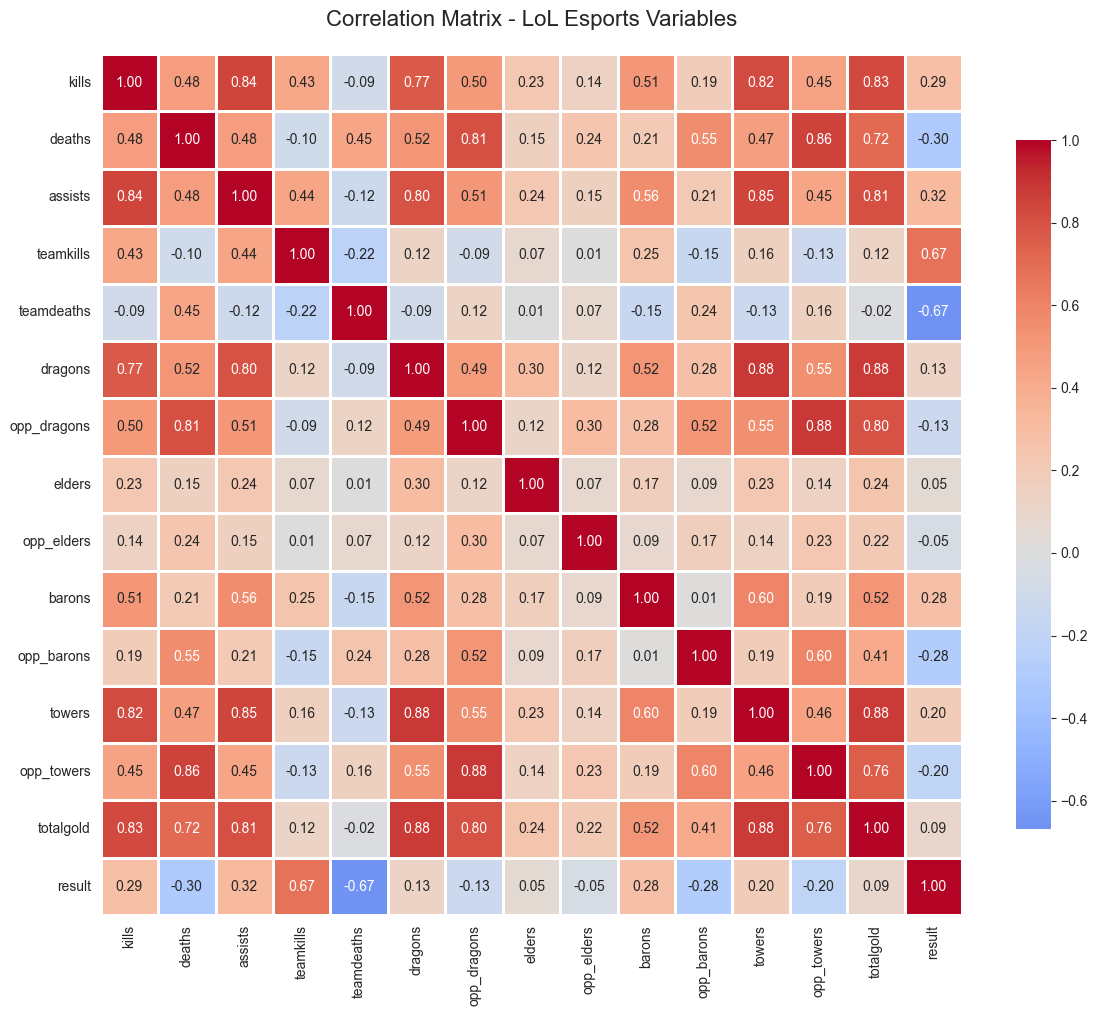

In [143]:
correlation = df_clean.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - LoL Esports Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [144]:
correlation_result = correlation['result'].sort_values(ascending=False)
print("Correlation of each variable with match result:")
print("="*60)
print(correlation_result)

Correlation of each variable with match result:
result         1.000000
teamkills      0.670322
assists        0.317662
kills          0.285456
barons         0.279322
towers         0.197904
dragons        0.129272
totalgold      0.089729
elders         0.051034
opp_elders    -0.051034
opp_dragons   -0.129272
opp_towers    -0.197904
opp_barons    -0.279322
deaths        -0.297691
teamdeaths    -0.668771
Name: result, dtype: float64


## Machine Learning Preparation

In [145]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df_clean.drop('result', axis=1)
y = df_clean['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining distribution:")
print(f"  Victories: {(y_train == 1).sum()} samples ({(y_train == 1).mean() * 100:.2f}%)")
print(f"  Defeats: {(y_train == 0).sum()} samples ({(y_train == 0).mean() * 100:.2f}%)")

print(f"\nTest distribution:")
print(f"  Victories: {(y_test == 1).sum()} samples ({(y_test == 1).mean() * 100:.2f}%)")
print(f"  Defeats: {(y_test == 0).sum()} samples ({(y_test == 0).mean() * 100:.2f}%)")


Training distribution:
  Victories: 4297 samples (50.01%)
  Defeats: 4296 samples (49.99%)

Test distribution:
  Victories: 1841 samples (49.99%)
  Defeats: 1842 samples (50.01%)


# AI Model Results

In [146]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, max_iter=1000, tol=0.001, learning_rate='constant', eta0=0.001, shuffle=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(f"Model accuracy (train): {model.score(X_train, y_train):.2%}")

r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred)

print(f"R² (Coefficient of Determination):   {r2:.4f}")
print(f"MSE (Mean Squared Error):            {mse:.2f}")
print(f"RMSE (Root Mean Squared Error):      {rmse:.2f}")
print(f"MAE (Mean Absolute Error):           {mae:.2f}")

print("=" * 50)
print(f"Model accuracy (Test): {model.score(X_test, y_test):.2%}")

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² (Coefficient of Determination):   {r2:.4f}")
print(f"MSE (Mean Squared Error):            {mse:.2f}")
print(f"RMSE (Root Mean Squared Error):      {rmse:.2f}")
print(f"MAE (Mean Absolute Error):           {mae:.2f}")

Model accuracy (train): 94.98%
R² (Coefficient of Determination):   0.7994
MSE (Mean Squared Error):            0.05
RMSE (Root Mean Squared Error):      0.22
MAE (Mean Absolute Error):           0.05
Model accuracy (Test): 94.38%
R² (Coefficient of Determination):   0.7752
MSE (Mean Squared Error):            0.06
RMSE (Root Mean Squared Error):      0.24
MAE (Mean Absolute Error):           0.06


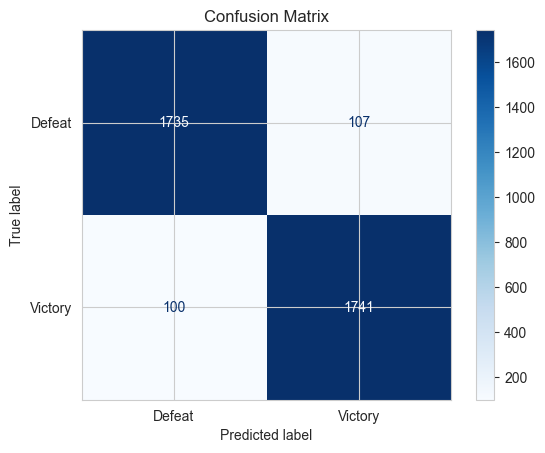


Precision: 0.9421
Recall: 0.9457
F1-Score: 0.9439

True Negatives (Correct defeats): 1735
False Positives (Defeats predicted as victories): 107
False Negatives (Victories predicted as defeats): 100
True Positives (Correct victories): 1741


In [147]:
from sklearn.metrics import precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Defeat', 'Victory'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

precision_default = precision_score(y_test, y_pred)
recall_default = recall_score(y_test, y_pred)
f1_default = f1_score(y_test, y_pred)
print(f"\nPrecision: {precision_default:.4f}")
print(f"Recall: {recall_default:.4f}")
print(f"F1-Score: {f1_default:.4f}")

print(f"\nTrue Negatives (Correct defeats): {cm[0,0]}")
print(f"False Positives (Defeats predicted as victories): {cm[0,1]}")
print(f"False Negatives (Victories predicted as defeats): {cm[1,0]}")
print(f"True Positives (Correct victories): {cm[1,1]}")

# New Predictions

In [148]:
# Create new example data for predictions
# Format: [kills, deaths, assists, teamkills, teamdeaths, dragons, opp_dragons, 
#          elders, opp_elders, barons, opp_barons, towers, opp_towers, totalgold]

new_matches = pd.DataFrame([
    # Match 1: Dominant team (many towers, barons, gold)
    [5, 2, 8, 25, 10, 3, 1, 1, 0, 2, 0, 9, 3, 15000],
    
    # Match 2: Losing team (few towers, no objectives)
    [2, 7, 3, 12, 28, 1, 4, 0, 2, 0, 3, 2, 10, 10000],
    
    # Match 3: Balanced match
    [4, 4, 6, 20, 20, 2, 2, 1, 1, 1, 1, 6, 6, 12500],
    
    # Match 4: Extreme advantage
    [8, 1, 12, 35, 8, 4, 0, 2, 0, 3, 0, 11, 1, 18000],
    
    # Match 5: Extreme disadvantage
    [1, 9, 2, 8, 35, 0, 4, 0, 2, 0, 3, 1, 11, 8000]
], columns=['kills', 'deaths', 'assists', 'teamkills', 'teamdeaths', 
            'dragons', 'opp_dragons', 'elders', 'opp_elders', 
            'barons', 'opp_barons', 'towers', 'opp_towers', 'totalgold'])

# Scale the new data with the same scaler
new_matches_scaled = scaler.transform(new_matches)

# Make predictions
predictions = model.predict(new_matches_scaled)

for i in range(len(new_matches)):
    print("="*10 + f"Match {i+1}" + "="*10)
    result = "VICTORY" if predictions[i] == 1 else "DEFEAT"
    print(f"Team Kills: {new_matches.teamkills[i]}, Team Deaths: {new_matches.teamdeaths[i]}")
    print(f"Our Towers: {new_matches.towers[i]}, Opponent Towers: {new_matches.opp_towers[i]}")
    print(f"Prediction = {result} \n")

==========Match 1==========
Team Kills: 25, Team Deaths: 10
Our Towers: 9, Opponent Towers: 3
Prediction = VICTORY 

==========Match 2==========
Team Kills: 12, Team Deaths: 28
Our Towers: 2, Opponent Towers: 10
Prediction = DEFEAT 

==========Match 3==========
Team Kills: 20, Team Deaths: 20
Our Towers: 6, Opponent Towers: 6
Prediction = DEFEAT 

==========Match 4==========
Team Kills: 35, Team Deaths: 8
Our Towers: 11, Opponent Towers: 1
Prediction = VICTORY 

==========Match 5==========
Team Kills: 8, Team Deaths: 35
Our Towers: 1, Opponent Towers: 11
Prediction = DEFEAT 

